<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate a decision tree model and a random forest model for classification tasks.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q1.1.** Build a classification model using Decision Trees to predict the target variable `RainTomorrow` from the dataset.

> **Q1.2.** Evaluate and discuss the model performance.

> **Q1.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q1.4.** Evaluate and discuss the model performance after the pruning.

> **Q1.5.** Build a classification model using Random Forests to predict the target variable `RainTomorrow` from the dataset.

> **Q1.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q1.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q1.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weatherAUS_df = pd.read_csv('weatherAUS.csv')
weatherAUS_df.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [3]:
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [4]:
weatherAUS_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


In [5]:
#Find NA Values across the columns
NA_val_across_columns = weatherAUS_df.isnull().sum()
print(NA_val_across_columns)

#Find the total NA cell values across the dataset
total_NA_count_across_df = NA_val_across_columns.sum()
print("Total NA Count\t=>",total_NA_count_across_df)

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64
Total NA Count	=> 75908


In [6]:

# Removing duplicate rows and keep only the last occurrence
weatherAUS_df = weatherAUS_df.drop_duplicates(keep='last')

In [7]:
#Remove NA values row from the Target RainTomorrow 
weatherAUS_df.dropna(subset=['RainTomorrow'], inplace=True)
# weatherAUS_df.dropna(inplace = True)
print(weatherAUS_df.shape[0])



36261


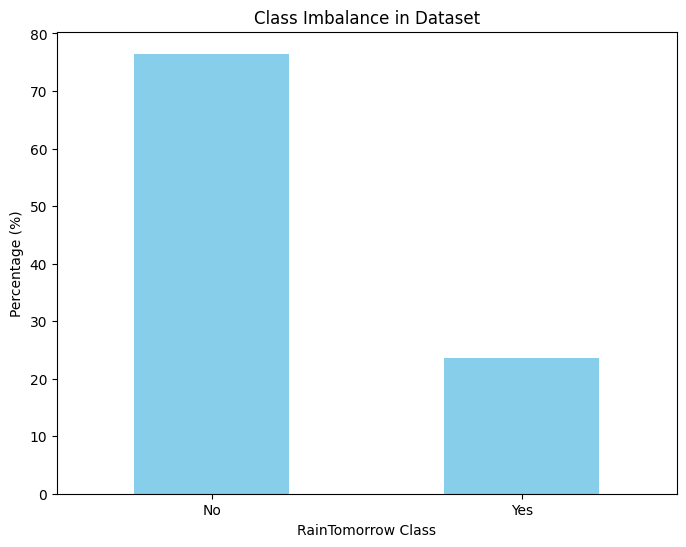

In [8]:
import matplotlib.pyplot as plt

# Calculate the count of each class
class_counts = weatherAUS_df['RainTomorrow'].value_counts()

# Calculate the percentage of each class
class_imbalance_percentage = (class_counts / len(weatherAUS_df)) * 100

# Plot the histogram
plt.figure(figsize=(8, 6))
class_imbalance_percentage.plot(kind='bar', color='skyblue')
plt.title('Class Imbalance in Dataset')
plt.xlabel('RainTomorrow Class')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


In [9]:
import pandas as pd

# Assuming weatherAUS_df is your DataFrame containing the data
# Assuming RainTomorrow is the target variable

# Step 1: Measure the count of each class of RainTomorrow
class_counts = weatherAUS_df['RainTomorrow'].value_counts()

# Step 2: Determine the minority class
minority_class = class_counts.idxmin()

# Step 3: Sample an equal number of data points from each class
balanced_data = pd.concat([
    weatherAUS_df[weatherAUS_df['RainTomorrow'] == minority_class],
    weatherAUS_df[weatherAUS_df['RainTomorrow'] != minority_class].sample(n=class_counts[minority_class], random_state=78)
])

# Display the class counts in the balanced dataset
print(balanced_data['RainTomorrow'].value_counts())
weatherAUS_df = balanced_data

RainTomorrow
Yes    8529
No     8529
Name: count, dtype: int64


In [10]:
import pandas as pd


# Count rows with at least one NaN value
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)


Number of rows with at least one NaN value: 9039


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Select numeric columns for normalization and imputation
numeric_columns = weatherAUS_df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numeric columns
normalized_data = scaler.fit_transform(numeric_columns)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns, index=weatherAUS_df.index)

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Impute missing values on normalized data
imputed_data = imputer.fit_transform(normalized_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns.columns, index=weatherAUS_df.index)

# Inverse transform to get original scale
imputed_original_scale = scaler.inverse_transform(imputed_df)

# Update the original DataFrame with the imputed values
weatherAUS_df[numeric_columns.columns] = imputed_original_scale

# Verify if any missing values are remaining
print("Number of missing values after imputation:")
print(weatherAUS_df.isnull().sum())

print(weatherAUS_df.head())
# Now weatherAUS_df contains imputed values for normalized numeric columns


Number of missing values after imputation:
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      1465
WindGustSpeed       0
WindDir9am       1163
WindDir3pm        390
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         221
RISK_MM             0
RainTomorrow        0
dtype: int64
          Date    Location  MinTemp  MaxTemp      Rainfall  Evaporation  \
5    9/28/2011     Mildura     15.7     27.3 -4.440892e-16        11.20   
11    3/3/2009   Nuriootpa     16.4     28.0  1.000000e+00         5.00   
15  11/22/2009  Launceston     10.7     18.0  6.000000e+00         2.96   
21   11/5/2010   NorahHead     13.8     19.2  1.860000e+01         4.36   
23  10/31/2010  Launceston     14.4     2

In [12]:
for column in weatherAUS_df.columns.tolist():
    weatherAUS_df[column] = weatherAUS_df[column].fillna(weatherAUS_df[column].mode()[0])
# Assuming weatherAUS_df is your DataFrame

# Count rows with at least one NaN value
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)

Number of rows with at least one NaN value: 0


In [13]:
weatherAUS_df = weatherAUS_df.drop(columns=['Date', 'Location', 'RISK_MM', 'RainToday'])
print(weatherAUS_df.shape[0])

17058


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


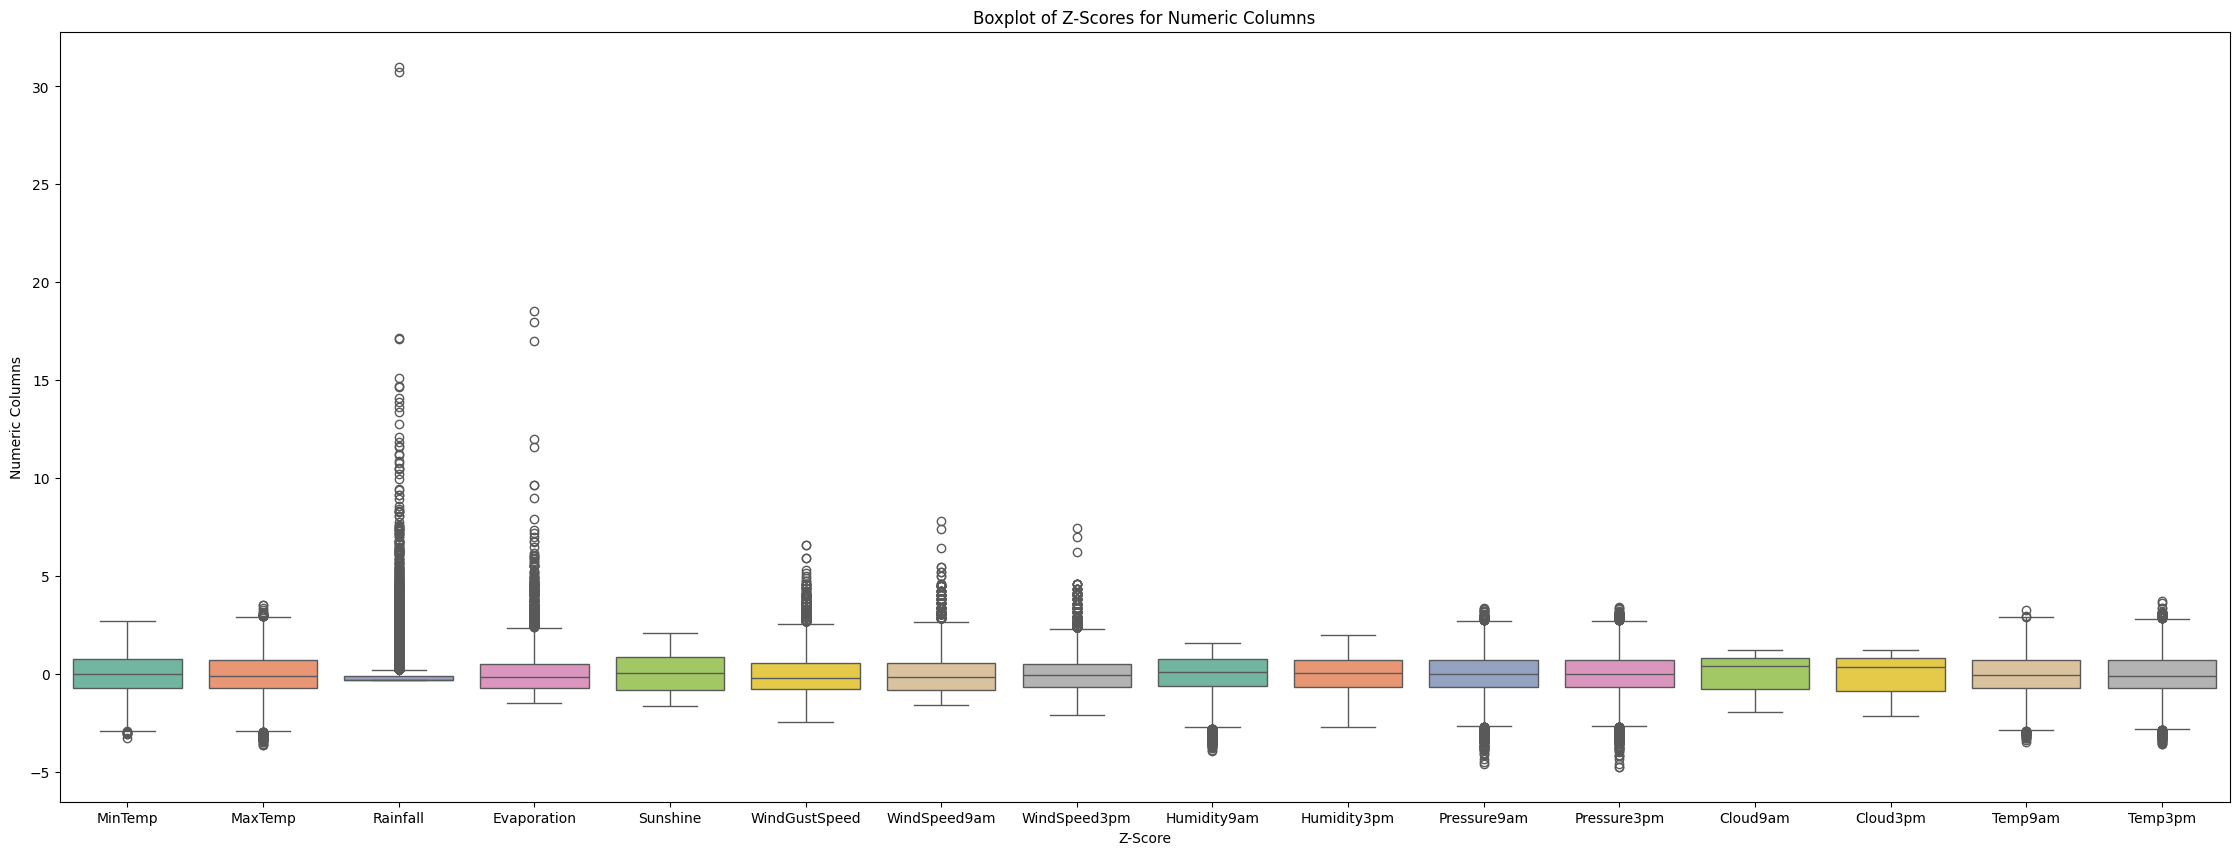

Total data row count => 17058
Oultlier row count => 1081


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate z-scores for each numeric column
weatherAUS_df_numeric = weatherAUS_df.select_dtypes(include=['number'])
print(weatherAUS_df_numeric.columns.tolist())
z_scores = stats.zscore(weatherAUS_df_numeric)

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=weatherAUS_df.select_dtypes(include=np.number).columns)

# Set up the boxplot figure
plt.figure(figsize=(28, 10))

# Draw boxplots for each numeric column
sns.boxplot(data=z_scores_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
print("Total data row count =>",weatherAUS_df.shape[0])
outlier_rows = weatherAUS_df[(abs_z_scores > threshold).any(axis=1)]
print("Oultlier row count =>",outlier_rows.shape[0])


In [15]:
# We only take the data with no outliers
weatherAUS_df = weatherAUS_df[(abs_z_scores <= threshold).all(axis=1)]


In [16]:
# Label Encoding the Target Variable
weatherAUS_df['RainTomorrow']= weatherAUS_df['RainTomorrow'].replace({"Yes":1, "No":0}) 
weatherAUS_df['RainTomorrow'] = weatherAUS_df['RainTomorrow'].astype(int)

# Perform one-hot encoding on all categorical columns
weatherAUS_final_df = pd.get_dummies(weatherAUS_df)
weatherAUS_final_df.replace({True: 1, False: 0}, inplace=True)


/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_6614/2196558029.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherAUS_df['RainTomorrow']= weatherAUS_df['RainTomorrow'].replace({"Yes":1, "No":0})
/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_6614/2196558029.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherAUS_final_df.replace({True: 1, False: 0}, inplace=True)


In [17]:
print(weatherAUS_final_df.head())
print(weatherAUS_final_df.columns.tolist())

    MinTemp  MaxTemp      Rainfall  Evaporation  Sunshine  WindGustSpeed  \
5      15.7     27.3 -4.440892e-16        11.20      5.60           65.0   
11     16.4     28.0  1.000000e+00         5.00      1.70           65.0   
15     10.7     18.0  6.000000e+00         2.96      2.54           33.0   
21     13.8     19.2  1.860000e+01         4.36      3.74           61.0   
23     14.4     21.1  4.400000e+00         4.76      6.44           57.0   

    WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
5           11.0          13.0         60.0         86.0  ...               0   
11          15.0          37.0         39.0         96.0  ...               0   
15           6.0          15.0         93.0         87.0  ...               0   
21          31.0          22.0         75.0         83.0  ...               0   
23          13.0          37.0         74.0         67.0  ...               0   

    WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3

In [18]:
print(weatherAUS_final_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15977 entries, 5 to 32699
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          15977 non-null  float64
 1   MaxTemp          15977 non-null  float64
 2   Rainfall         15977 non-null  float64
 3   Evaporation      15977 non-null  float64
 4   Sunshine         15977 non-null  float64
 5   WindGustSpeed    15977 non-null  float64
 6   WindSpeed9am     15977 non-null  float64
 7   WindSpeed3pm     15977 non-null  float64
 8   Humidity9am      15977 non-null  float64
 9   Humidity3pm      15977 non-null  float64
 10  Pressure9am      15977 non-null  float64
 11  Pressure3pm      15977 non-null  float64
 12  Cloud9am         15977 non-null  float64
 13  Cloud3pm         15977 non-null  float64
 14  Temp9am          15977 non-null  float64
 15  Temp3pm          15977 non-null  float64
 16  RainTomorrow     15977 non-null  int64  
 17  WindGustDir_E    

In [24]:
# import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
# import seaborn as sns

weatherAUS_df_numerics = weatherAUS_df.select_dtypes(include=['number'])
# params = {
#     'legend.fontsize': 'x-large',
#     'figure.figsize': (15, 5),
#     'axes.labelsize': 'x-large',
#     'axes.titlesize':'x-large',
#     'xtick.labelsize':'x-large',
#     'ytick.labelsize':'x-large'
# }
# pylab.rcParams.update(params)

# plt.figure(figsize=(32, 62))

# num_cols = 3
# num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

# for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.histplot(weatherAUS_df_numerics, x=col, hue='RainTomorrow', kde=True, bins=50)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=20)
#     plt.ylabel('Count', fontsize=20)

# plt.tight_layout()
# plt.show()

In [20]:
# from pandas.plotting import scatter_matrix
# attributes = weatherAUS_df_numerics.columns.tolist()
# scatter_matrix(weatherAUS_df_numerics[attributes], figsize=(32, 72), c=weatherAUS_df_numerics['RainTomorrow'], marker='o', hist_kwds={'bins': 20}, alpha=0.5)
# plt.show()

In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(32, 32))

# num_cols = 5
# num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

# for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.scatterplot(data=weatherAUS_df_numerics, x=col, y='RainTomorrow')

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=20)
#     plt.ylabel('RainTomorrow', fontsize=20)

# plt.tight_layout()
# plt.show()


MinTemp          0.119121
MaxTemp         -0.158635
Rainfall         0.275796
Evaporation     -0.136445
Sunshine        -0.508004
WindGustSpeed    0.238995
WindSpeed9am     0.099987
WindSpeed3pm     0.076225
Humidity9am      0.303192
Humidity3pm      0.504168
Pressure9am     -0.281516
Pressure3pm     -0.262105
Cloud9am         0.403232
Cloud3pm         0.492811
Temp9am         -0.001730
Temp3pm         -0.202517
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64


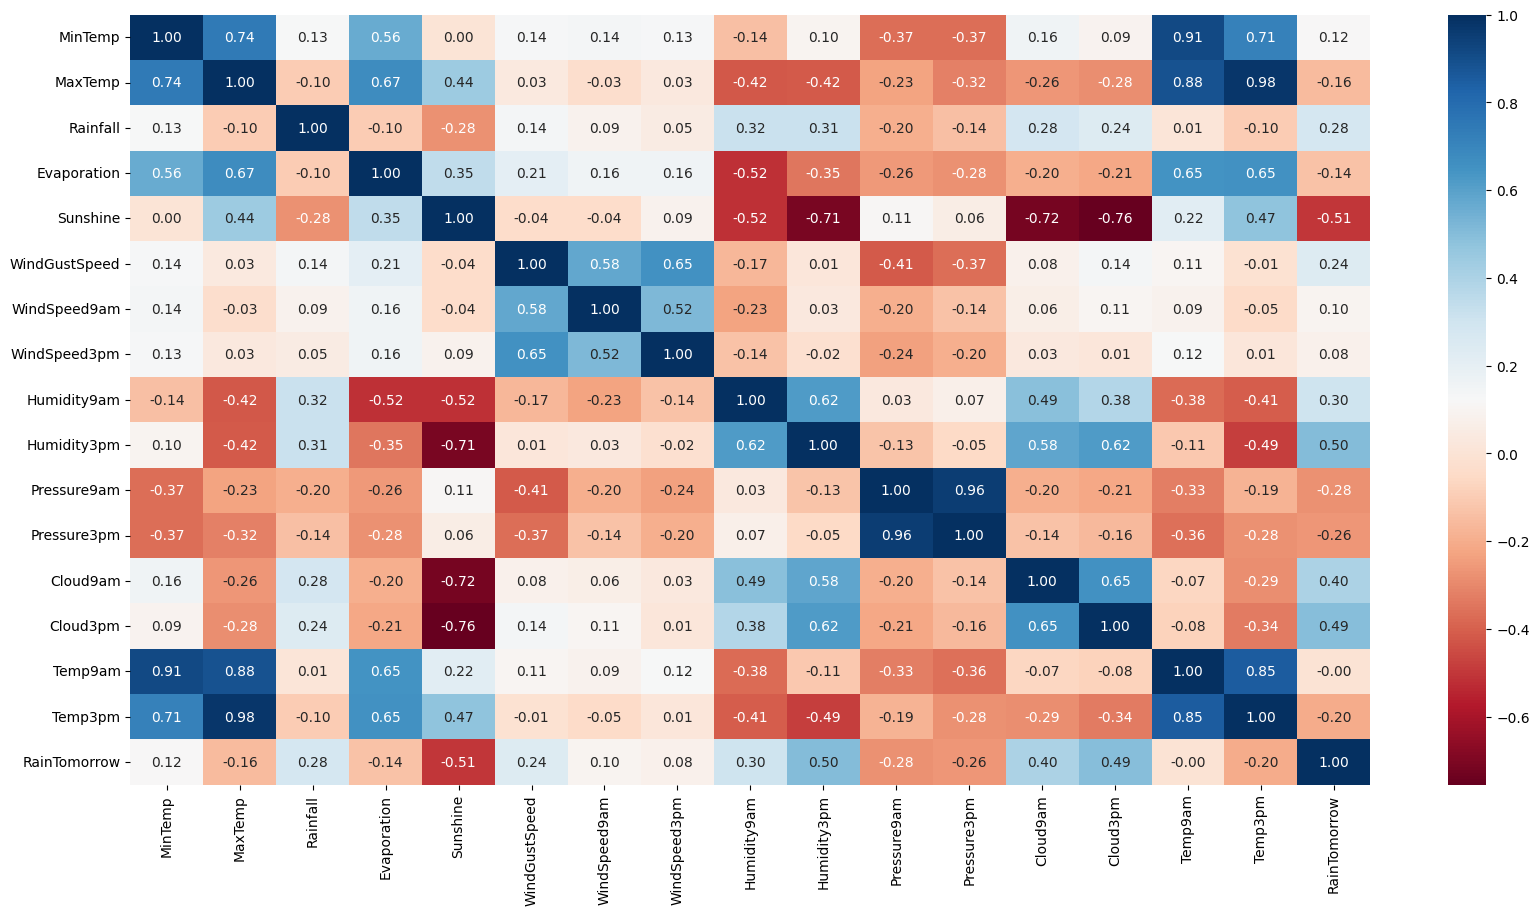

In [25]:
weatherAUS_df_corr_matrix = weatherAUS_df_numerics.corr(numeric_only=True)
print(weatherAUS_df_corr_matrix['RainTomorrow'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(weatherAUS_df_numerics.corr(numeric_only=True), cmap='RdBu', annot=True, fmt=".2f");

In [32]:
weatherAUS_df.drop(columns=['Temp9am'], inplace=True)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(32, 62))

# num_cols = 3
# num_rows = int(weatherAUS_df_numerics.shape[1] / num_cols) + 1

# for index, col in enumerate(weatherAUS_df_numerics.drop('RainTomorrow', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.boxplot(data=weatherAUS_df_numerics, x='RainTomorrow', y=col)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel('RainTomorrow', fontsize=20)
#     plt.ylabel(col, fontsize=20)

# plt.tight_layout()
# plt.show()

In [33]:
# Getting independent and dependent variables
y = weatherAUS_final_df.RainTomorrow.values
X = weatherAUS_final_df.drop(['RainTomorrow'], axis=1)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [29]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.552649850082166, 0.9827586206896551, 'Sunshine <= 6.81\ngini = 0.5\nsamples = 12781\nvalue = [6523, 6258]\nclass = No Rain'),
 Text(0.3069033806488762, 0.9482758620689655, 'Humidity3pm <= 74.1\ngini = 0.41\nsamples = 6677\nvalue = [1922.0, 4755.0]\nclass = Yes Rain'),
 Text(0.16988408115018983, 0.9137931034482759, 'Pressure3pm <= 1013.58\ngini = 0.48\nsamples = 3940\nvalue = [1572, 2368]\nclass = Yes Rain'),
 Text(0.07082884712532046, 0.8793103448275862, 'Humidity3pm <= 56.9\ngini = 0.382\nsamples = 1762\nvalue = [453, 1309]\nclass = Yes Rain'),
 Text(0.026322484685989394, 0.8448275862068966, 'WindGustSpeed <= 42.1\ngini = 0.46\nsamples = 638\nvalue = [229, 409]\nclass = Yes Rain'),
 Text(0.01079319725228487, 0.8103448275862069, 'Cloud3pm <= 5.1\ngini = 0.5\nsamples = 209\nvalue = [105.0, 104.0]\nclass = No Rain'),
 Text(0.006575728516351254, 0.7758620689655172, 'WindDir9am_W <= 0.5\ngini = 0.448\nsamples = 68\nvalue = [45, 23]\nclass = No Rain'),
 Text(0.005323208798951015, 0.

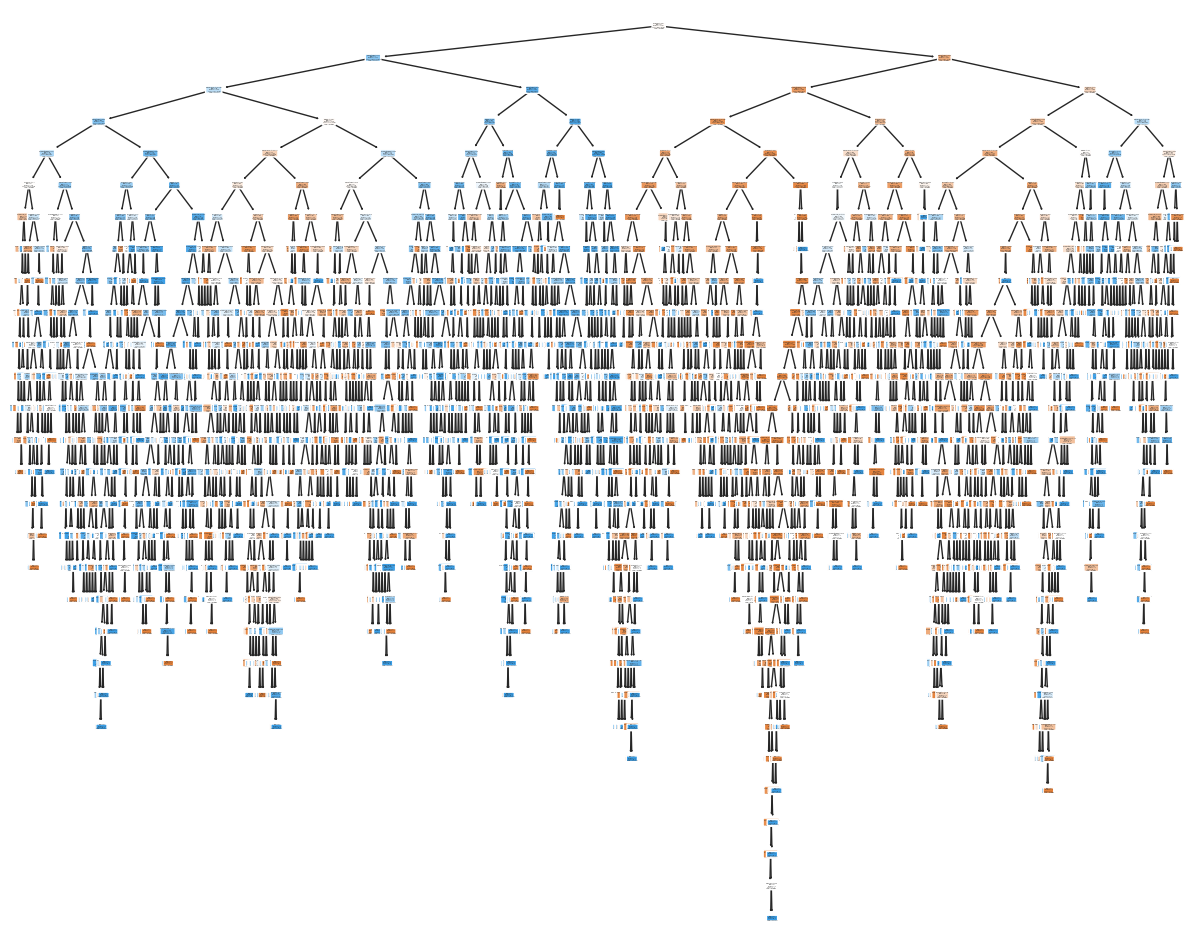

In [30]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No Rain", "Yes Rain"], 
          feature_names=X.columns)

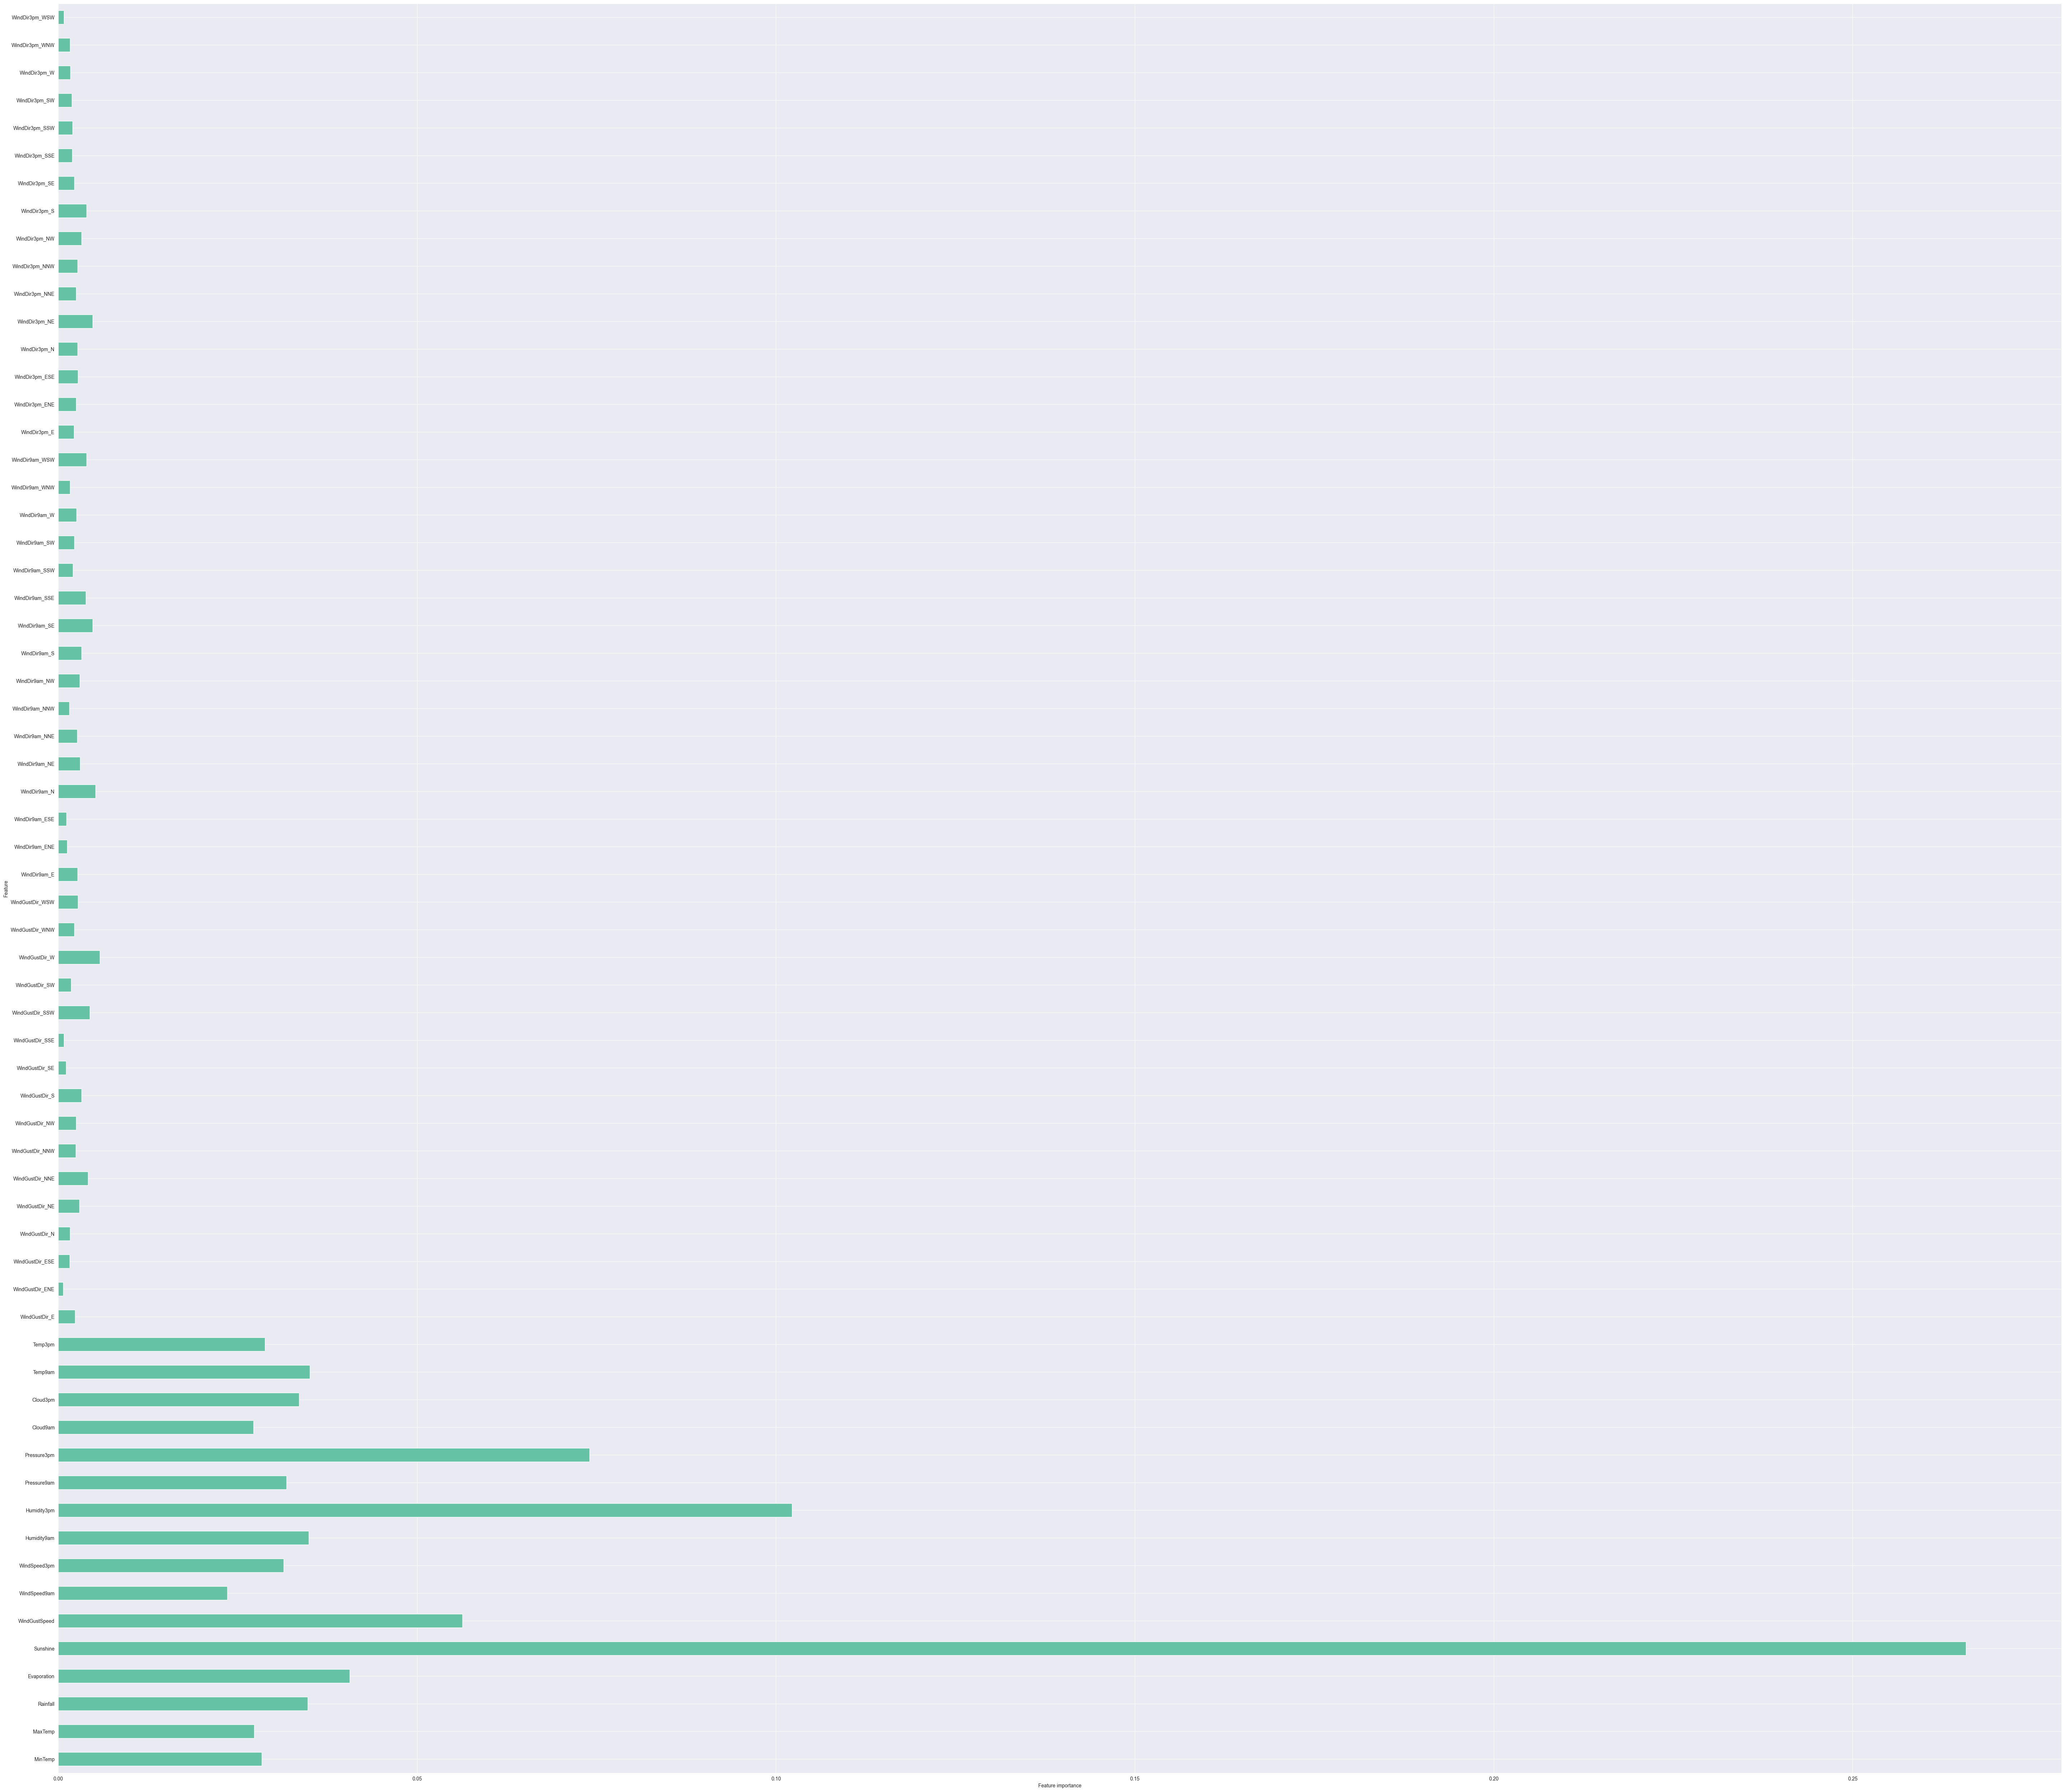

In [31]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.figure(figsize=(72, 64))  # Increase the figure size
    bar_width = 0.5  # Adjust the width of the bars
    plt.barh(np.arange(n_features), model.feature_importances_, height=bar_width, align='center')  # Adjust the height
    plt.yticks(np.arange(n_features), X.columns, fontsize=10)  # Adjust fontsize
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features - 0.5)  # Adjust ylim for better spacing

plot_feature_importances_(clf_dt)


In [36]:
y_pred = clf_dt.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6949311639549437

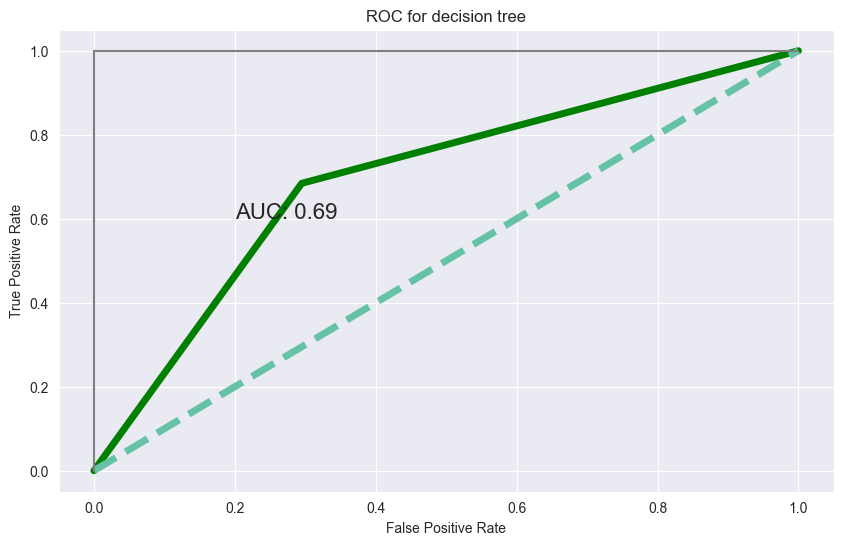

In [38]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6946330925326711

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1644
           1       0.69      0.68      0.69      1552

    accuracy                           0.69      3196
   macro avg       0.69      0.69      0.69      3196
weighted avg       0.69      0.69      0.69      3196



In [ ]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0005)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [ ]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list


for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [ ]:
alpha_results['mean accuracy'].max()

In [ ]:
alpha_results['mean accuracy'].idxmax()

In [ ]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["No Rain", "Yes Rain"], 
          feature_names=X.columns)

# Question 2: Multi-Class Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q2.1.** Build a classification model using Decision Trees to predict the target variable `species` from the dataset.

> **Q2.2.** Evaluate and discuss the model performance.

> **Q2.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q2.4.** Evaluate and discuss the model performance after the pruning.

> **Q2.5.** Build a classification model using Random Forests to predict the target variable `species` from the dataset.

> **Q2.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q2.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q2.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

???

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab3.ipynb** to the **Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection